In [270]:
#Import Libraries (seaborn,matplotlib,pandas,numpy,math,sklearn,tensorflow,keras,sys,os,warnings)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import * #from numpy import reshape 
from math import *

#scikit-learn libraries
import sklearn.gaussian_process as gp
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.cross_decomposition
import sklearn.neighbors
import sklearn.model_selection
import sklearn.metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.preprocessing import *
from sklearn.cluster import DBSCAN
 
#Tensorflow and keras libraries
import tensorflow,keras
import tensorflow as tf
import keras.utils.np_utils
import keras.preprocessing.sequence
import keras.optimizers
import keras.backend as K
import keras.callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,TimeDistributed,LeakyReLU,BatchNormalization
from keras.layers import Embedding,Bidirectional
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D,LSTM
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau    
from keras import optimizers
from numpy import reshape
from numpy.random import seed
from tensorflow import set_random_seed


import sys
import os.path

import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier

#ARC GIS
from arcgis import *

#Cluster analysis
from sklearn.cluster import DBSCAN
            

In [271]:
!pip install msgpack
!pip install geographiclib
!pip install geopy
!pip install shapely
!pip install geopandas
!pip install pyclustering
#!pip install --upgrade pip

In [272]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

import geopy
from geopy.distance import great_circle, vincenty


from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

from pyclustering.cluster.optics import optics
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

In [295]:
np.random.seed(42) #set seed to make results replicable
data_path = '/Users/Richard/Documents/DL-Predictive Modeling/HackTheMachine18/Seattle_Track_2/Data' #set path

#save all plots to a plot folder
if not os.path.exists(data_path): 
    os.mkdir(data_path)
plot_path = 'plots'
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

In [296]:
df= pd.read_csv(os.path.join(data_path, 'Example_COLREGs_Interactions_UTM11.csv'))
#df= pd.read_csv(os.path.join(data_path, 'Caribbean_Dec_2017_UTM17_ProximityFiltered_File1.csv'))
#df= pd.read_csv(os.path.join(data_path, 'AIS_2017_01_Zone11.csv'))

In [220]:
df.head()

,COLREG_Type,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,Overtaking,372747000,12/3/17 9:00:16,33.648643,-120.275227,0,0,0,CYGNUS LEADER,IMO9381249,3EKK5,1004,NaN,199.94,32.26,10.0,NaN
1,Overtaking,372747000,12/3/17 9:00:36,33.648692,-120.274767,0,0,0,CYGNUS LEADER,IMO9381249,3EKK5,1004,NaN,199.94,32.26,10.0,NaN
2,Overtaking,372747000,12/3/17 9:01:00,33.648742,-120.274307,0,0,0,CYGNUS LEADER,IMO9381249,3EKK5,1004,NaN,199.94,32.26,10.0,NaN
3,Overtaking,372747000,12/3/17 9:01:20,33.648792,-120.273847,0,0,0,CYGNUS LEADER,IMO9381249,3EKK5,1004,NaN,199.94,32.26,10.0,NaN
4,Overtaking,372747000,12/3/17 9:01:40,33.648840,-120.273387,0,0,0,CYGNUS LEADER,IMO9381249,3EKK5,1004,NaN,199.94,32.26,10.0,NaN


In [221]:
df.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Length,Width,Draft,Cargo
count,2.058500e+04,20585.000000,20585.000000,20585.0,20585.0,20585.0,20585.000000,20585.00000,20585.000000,20585.000000,10403.000000
mean,4.813235e+08,33.758988,-119.229006,0.0,0.0,0.0,841.034783,213.21632,33.790273,11.591188,80.441507
std,1.298432e+08,0.076469,1.739290,0.0,0.0,0.0,354.250504,44.30447,7.884192,4.042996,8.053400
min,2.597390e+08,33.628018,-120.448252,0.0,0.0,0.0,81.000000,162.50000,26.000000,8.100000,70.000000
25%,3.727470e+08,33.706140,-119.663153,0.0,0.0,0.0,1004.000000,179.90000,32.200000,9.600000,70.000000
50%,5.380041e+08,33.758328,-119.191873,0.0,0.0,0.0,1004.000000,199.94000,32.260000,9.700000,81.000000
75%,5.663410e+08,33.804875,-118.778308,0.0,0.0,0.0,1004.000000,229.10000,34.000000,14.500000,90.000000
max,6.360912e+08,34.028930,119.010018,0.0,0.0,0.0,1024.000000,332.93000,58.100000,22.700000,90.000000


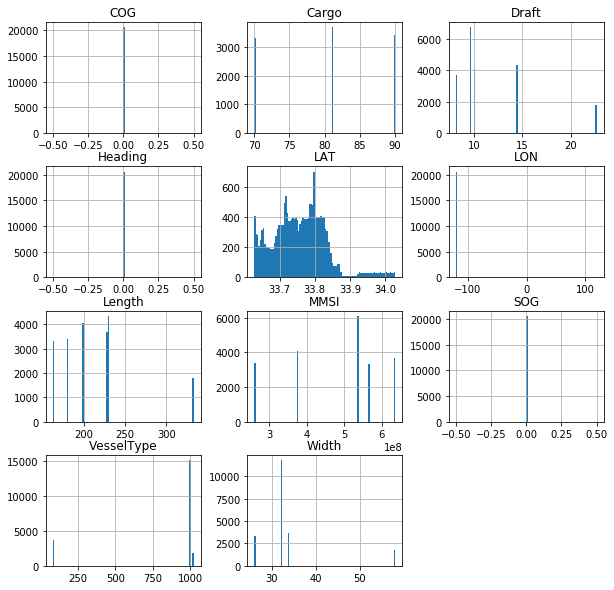

In [187]:
plt.rcParams['figure.figsize'] = 10,10
df.hist(bins=100);
plt.show()

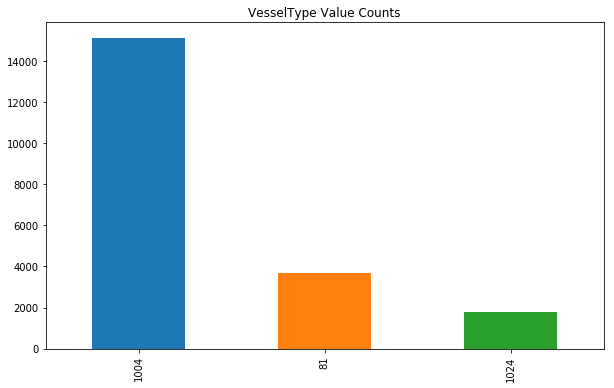

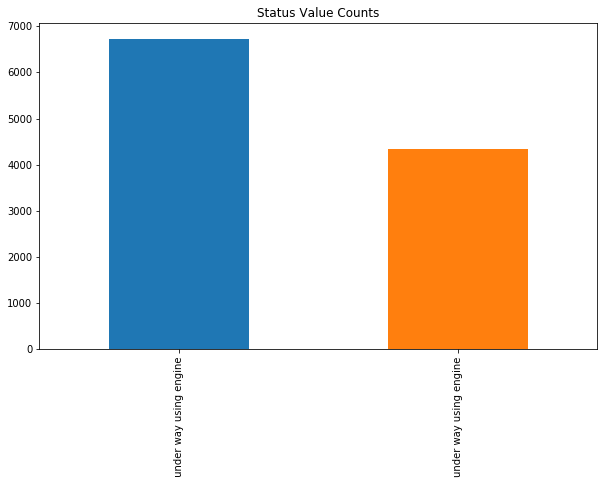

In [188]:
plt.rcParams['figure.figsize'] = 10,6
for col in ['VesselType','Status']:
    df[col].value_counts().plot(kind='bar')
    plt.title(str(col)+ " Value Counts")
    plt.show()

In [297]:
print("Min LAT value: {}, Max LAT value:{}".format(np.min(df.LAT.values),np.max(df.LAT.values)))
print("Min LON value: {}, Max LON value:{}".format(np.min(df.LON.values),np.max(df.LON.values)))

Min LAT value: 33.62801833, Max LAT value:34.02893
Min LON value: -120.4482517, Max LON value:119.0100183


In [298]:
#Data cleaning
df['MMSI'] = df['MMSI'].astype(str)
df.BaseDateTime = pd.to_datetime(df.BaseDateTime, errors='raise')
df['LAT'] = df['LAT'].astype(str)
df['LON'] = df['LON'].astype(str)
df['LAT_int'], df['LAT_dec'] = df['LAT'].str.split('.', 1).str
df['LON_int'], df['LON_dec'] = df['LON'].str.split('.', 1).str
df['LATLON_ints'] = list(zip(df.LAT_int, df.LON_int))

high_traffic_region = df['LATLON_ints'].value_counts().index[0]

#find the highest populated lat/lon pair
region_df = df[df.LATLON_ints == high_traffic_region]
print('Highest traffic region: {} Number of rows: {}'.format(high_traffic_region, region_df.shape[0]))

#Dropping nulls
region_df = region_df.dropna(how='any')

region_df['LAT'] = region_df['LAT'].astype(float)
region_df['LON'] = region_df['LON'].astype(float)
df_min = region_df[['MMSI', 'BaseDateTime', 'LAT','LON', 'VesselType', 'SOG','COG','Status','Cargo']].copy()
print('Number of rows after dropping nulls', df_min.shape[0])

Highest traffic region: ('33', '-119') Number of rows: 10694
Number of rows after dropping nulls 4178


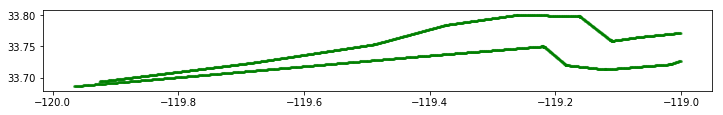

In [191]:
geometry = [Point(xy) for xy in zip(df_min['LON'], df_min['LAT'])]
gdf = GeoDataFrame(df_min, geometry=geometry)
gdf['date'] = gdf.BaseDateTime.apply(lambda x: x.date())
gdf.plot(marker='*', color='green', markersize=5, figsize=(12, 12), alpha =0.3);

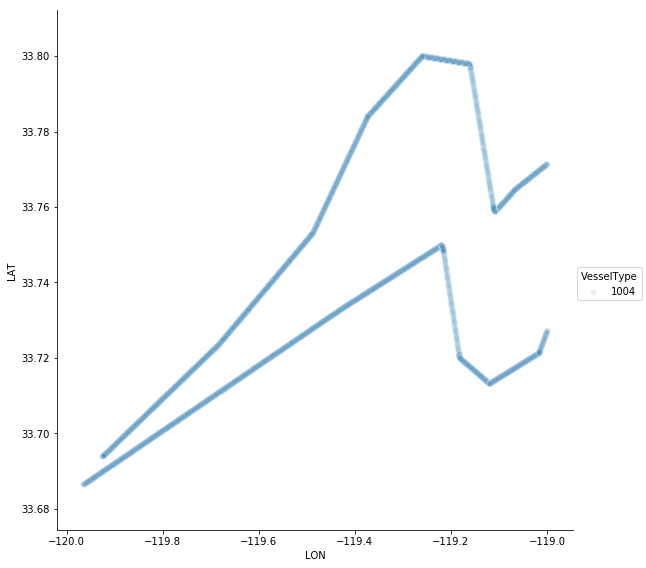

In [192]:
sns.pairplot(x_vars=["LON"], y_vars=["LAT"], data=gdf,  hue="VesselType", size=8, plot_kws={'alpha':0.1})
plt.show()

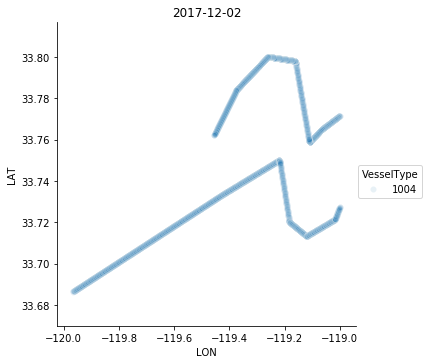

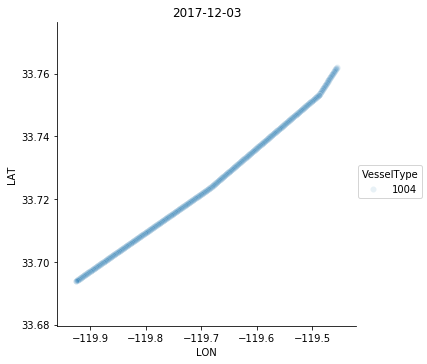

In [193]:
for i in gdf.date.unique()[:7]: #looking at 7 days
    day_df = gdf[gdf.date==i]
    sns.pairplot(x_vars=["LON"], y_vars=["LAT"], data=day_df,  hue="VesselType", size=5, plot_kws={'alpha':0.1})
    plt.title(str(day_df.date.values[0]))
    plt.show()

In [194]:
dbscan =DBSCAN(eps=0.3, min_samples=20)

In [105]:
coordinate=df.loc[:,['LAT','LON']]

In [16]:
coordinate.head()

,LAT,LON
0,33.64864333,-120.2752267
1,33.64869167,-120.27476670000001
2,33.64874167,-120.27430670000001
3,33.64879167,-120.27384669999999
4,33.64884,-120.2733867


In [17]:
db=dbscan.fit(coordinate)

In [106]:
region_df.head()

,COLREG_Type,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,Status,Length,Width,Draft,Cargo,LAT_int,LAT_dec,LON_int,LON_dec,LATLON_ints
15157,Meeting,259739000,2017-12-02 16:14:24,33.771503,-119.000248,0,0,0,HOEGH OSLO,IMO9382396,...,under way using engine,179.9,32.2,9.6,90.0,33,77150333,-119,0002483,"(33, -119)"
15158,Meeting,259739000,2017-12-02 16:14:44,33.771457,-119.000708,0,0,0,HOEGH OSLO,IMO9382396,...,under way using engine,179.9,32.2,9.6,90.0,33,77145667,-119,00070829999999,"(33, -119)"
15159,Meeting,259739000,2017-12-02 16:15:08,33.771410,-119.001170,0,0,0,HOEGH OSLO,IMO9382396,...,under way using engine,179.9,32.2,9.6,90.0,33,77141,-119,00117,"(33, -119)"
15160,Meeting,259739000,2017-12-02 16:15:28,33.771363,-119.001630,0,0,0,HOEGH OSLO,IMO9382396,...,under way using engine,179.9,32.2,9.6,90.0,33,77136333,-119,00163,"(33, -119)"
15161,Meeting,259739000,2017-12-02 16:15:48,33.771317,-119.002090,0,0,0,HOEGH OSLO,IMO9382396,...,under way using engine,179.9,32.2,9.6,90.0,33,77131667,-119,00209,"(33, -119)"


In [107]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [178]:
cats_cat_encode,cats_cat=region_df['Status'].factorize()

In [167]:
cat_encoder= OneHotEncoder()
j= cat_encoder.fit_transform(cats_cat_encode.reshape(-1,1))

In [173]:
j.toarray()

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
cats_j= pd.DataFrame(j.toarray())
cats_j

In [282]:
X = region_df.drop(['LON'], axis = 1)
y = region_df['LON']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

3342 836 3342 836


In [299]:
X = region_df.drop(['LAT'], axis = 1)
y = region_df['LAT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

3342 836 3342 836


In [283]:
X_train.head()

,COLREG_Type,MMSI,BaseDateTime,LAT,SOG,COG,Heading,VesselName,IMO,CallSign,...,Status,Length,Width,Draft,Cargo,LAT_int,LAT_dec,LON_int,LON_dec,LATLON_ints
15732,Meeting,259739000,2017-12-02 19:53:36,33.799485,0,0,0,HOEGH OSLO,IMO9382396,LAEK7,...,under way using engine,179.9,32.2,9.6,90.0,33,799485,-119,23118829999999,"(33, -119)"
18392,Meeting,566341000,2017-12-02 15:26:00,33.735575,0,0,0,STAR CARE,IMO9517903,9V9352,...,under way using engine,162.5,26.0,9.7,70.0,33,735575,-119,39759,"(33, -119)"
16244,Meeting,259739000,2017-12-03 00:05:16,33.760817,0,0,0,HOEGH OSLO,IMO9382396,LAEK7,...,under way using engine,179.9,32.2,9.6,90.0,33,76081667,-119,45990330000001,"(33, -119)"
15447,Meeting,259739000,2017-12-02 17:59:10,33.765532,0,0,0,HOEGH OSLO,IMO9382396,LAEK7,...,under way using engine,179.9,32.2,9.6,90.0,33,76553167,-119,1194017,"(33, -119)"
18232,Meeting,566341000,2017-12-02 14:22:30,33.728932,0,0,0,STAR CARE,IMO9517903,9V9352,...,under way using engine,162.5,26.0,9.7,70.0,33,72893167,-119,47606670000002,"(33, -119)"


In [300]:
#Prep data without PCA
#X_train1=df.drop(['LAT','LON','LAT_int','LAT_dec','LON_int','LON_dec','LATLON_ints','Status','BaseDateTime','COLREG_Type','MMSI','IMO'], axis=1)
#y_train1=df.loc[:, df.columns == 'LAT']

X_train1=X_train.drop(['VesselName','CallSign','LAT_int','LAT_dec','LON_int','LON_dec','Status','BaseDateTime','COLREG_Type','MMSI','IMO','LATLON_ints'], axis=1)
y_train1=y_train

X_test1=X_test.drop(['VesselName','CallSign','LAT_int','LAT_dec','LON_int','LON_dec','Status','BaseDateTime','COLREG_Type','MMSI','IMO','LATLON_ints'], axis=1)
y_test1=y_test

#X_train2=df.drop(['LAT','LON','LAT_int','LAT_dec','LON_int','LON_dec','LATLON_ints','Status','BaseDateTime','COLREG_Type','MMSI','IMO'], axis=1)
#y_train2=df.loc[:, df.columns == 'LON']



#X_test2=test.drop(['RUL'], axis=1)
#y_test2=test.loc[:, test.columns == 'RUL']



In [301]:
# SCALE DATA
#normalize features (using MinMaxScaler or one of the many alternatives)

#Remove id, cycle, and RUL for scaling
#train_scalables = X_train1[X_train1.columns.difference(['LAT'])].values
#test_scalables = X_test1[X_test1.columns.difference(['LAT'])].values

train_scalables = X_train1.values
test_scalables = X_test1.values


scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1)).fit(train_scalables)

test_values = scaler.transform(test_scalables)
train_values = scaler.transform(train_scalables)
    
#Add features back to data frame    
#X_train1[X_train1.columns.difference(['LAT'])] = train_values
#X_test1[X_test1.columns.difference(['LAT'])] = test_values


X_train1[X_train1.columns] = train_values
X_test1[X_test1.columns] = test_values

#Check values
X_test1.head()

,LON,SOG,COG,Heading,VesselType,Length,Width,Draft,Cargo
18185,0.482446,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15352,0.907595,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
18512,0.645673,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18718,0.744032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16515,0.397674,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [302]:
#Reshape data (must add another dimension of 1 as Conv1D require a 3dimensional object as an input)
X_train1 = np.expand_dims(X_train1, axis=2)
#X_testc1 = np.expand_dims(X_test1, axis=2)

X_test1 = np.expand_dims(X_test1, axis=2)
#X_testc2 = np.expand_dims(X_test2, axis=2)

#X_train1.as_matrix()
#X_test1.as_matrix()
#Check Shape
X_train1.shape

(3342, 9, 1)

In [211]:
from keras.layers import Conv2D, MaxPooling2D, Input

In [303]:
#Convnet settings
input_dim = 1 #
maxlen= 9 #number of features
dropout = 0.15 #dropout rate
batch_size = 500 #smaller batch sizes lead to longer training times
epochs =50 


model = Sequential()
model.add(Bidirectional(LSTM(input_dim, return_sequences=True),
                        input_shape=(maxlen,input_dim)))
model.add(Dropout(dropout,noise_shape=None, seed=None))
model.add(Bidirectional(LSTM(20)))
model.add(BatchNormalization())
model.add(LeakyReLU()) 
model.add(Dense(24))
model.add(LeakyReLU()) 
#model.add(Dense(24))
model.add(Dense(1, activation='linear'))

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer='adam', metrics=[rmse])
#model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [304]:
#Fitmodel
hist=model.fit(X_train1,y_train1,batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test1, y_test1))

In [305]:
#Convert predictions and actual values of RUL to dataframe
y_hat=model.predict(X_test1,batch_size) #predict RUL values
y_hat = pd.DataFrame(y_hat) #convert predicted RUL values to dataframe
y_hat=y_hat.iloc[:, 0]  #Store predicted values of RUL
y = pd.DataFrame(y_test1) #convert actual RUL values to dataframe
y=y.iloc[:, 0] #Store actual values of RUL

In [306]:
#y_hat.head()
#y.head()
#y_hat
#len(y_test1)
#dfL
y.index=np.arange(836)

In [307]:
y_hatL=[y_hat,y]
dfLAT=pd.concat(y_hatL, axis=1)
#dfLON=pd.concat(y_hatL, axis=1)

,0,LAT
0,33.995216,33.726863
1,35.493908,33.761580
2,33.995216,33.740060
3,33.995216,33.747758
4,35.493908,33.739047


In [308]:
LONLAT=[dfLAT,dfLON]
df_LONLAT=pd.concat(LONLAT, axis=1)
df_LONLAT
#dfL.to_csv('/Users/Richard/Documents/DL-Predictive Modeling/HackTheMachine18/Seattle_Track_2/DataLATLON.csv')

,0,LAT,0,LON
0,35.680870,33.726863,-117.795937,-119.499897
1,35.759743,33.761580,-118.888641,-119.089292
2,35.870014,33.740060,-117.669327,-119.342253
3,35.971954,33.747758,-117.566025,-119.247260
4,35.771568,33.739047,-118.907921,-119.581768
5,35.818817,33.752657,-118.902962,-119.491647
6,35.744930,33.734003,-118.910294,-119.615163
7,36.000534,33.749595,-117.537315,-119.218677
8,35.977768,33.695928,-118.829300,-119.909230
9,36.105396,33.714645,-117.873055,-119.102417


In [310]:
#df_LONLAT.columns = ['LAT_hat', 'LAT', 'LON_hat','LON']
#df_LONLAT
df_LONLAT.to_csv('/Users/Richard/Documents/DL-Predictive Modeling/HackTheMachine18/Seattle_Track_2/DataLATLON3.csv')

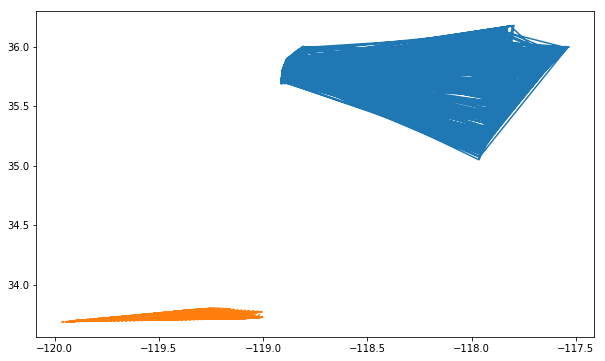

In [311]:
plt.plot(df_LONLAT.loc[:,'LON_hat'],df_LONLAT.loc[:,'LAT_hat'])
plt.plot(df_LONLAT.loc[:,'LON'],df_LONLAT.loc[:,'LAT'],linestyle=':')
#df_LONLAT[:,['LON_hat']]
#df_LONLAT.loc[:,['LAT','LON']]

In [268]:
#Deep CNN settings
set_random_seed(2) # makes results replicable for keras
input_dim = 1 #
maxlen=8
#maxlen= 15 #number of features
dropout = 0.3 #dropout rate
batch_size = 500 #smaller batch sizes lead to longer training times
epochs =50 
# Create the model

input = Input(shape=(maxlen,input_dim), name='input')
#lstm = LSTM(128, input_shape=(maxlen,input_dim))(input)
lstm=Bidirectional(LSTM(input_dim, return_sequences=True),input_shape=(maxlen,input_dim))(input)
l1=Dropout(dropout,noise_shape=None, seed=None)(lstm)
l2=LeakyReLU()(l1)


output1 = Dense(input_dim, activation='linear', name='output1')(l2)
output2 = Dense(input_dim, activation='linear', name='output2')(l2)

model = Model(inputs=[input], outputs=[output1, output2])

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 


model.compile(optimizer='adam', loss=['mse', 'mse'], metrics=[rmse,rmse],loss_weights=[0.5, 0.5])

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 8, 1)         0                                            
__________________________________________________________________________________________________
bidirectional_23 (Bidirectional (None, 8, 2)         24          input[0][0]                      
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 8, 2)         0           bidirectional_23[0][0]           
__________________________________________________________________________________________________
leaky_re_lu_23 (LeakyReLU)      (None, 8, 2)         0           dropout_12[0][0]                 
__________________________________________________________________________________________________
output1 (D

In [269]:
#Fitmodel
#Without dynamic learning rate
hist=model.fit(X_train1,y_train1,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test1, y_test1))

ValueError: Error when checking input: expected input to have shape (8, 1) but got array with shape (9, 1)